<a href="https://colab.research.google.com/github/byerHu/Machine-learning-algorithm-source-code-implementation/blob/master/knn%E6%BA%90%E7%A0%81%E5%AE%9E%E7%8E%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# python实现knn算法

KNN算法是机器学习最为简单的算法之一，具体的思想这里不做讲解了，可以自行上网查阅。本文主要是用python来模仿sklearn实现knn算法。

## 导入所需的库

In [0]:
import numpy as np
from math import sqrt
from collections import Counter

## knn的核心代码

In [0]:
def KNN_classify(k,X_train,y_train,x):
  """
    k:表示knn的中k的值
    X_train: 训练集的features
    y_train: 训练集的labels
    x: 新的数据
  """
  assert 1<=k<=X_train.shape[0],"k must be valid"
  assert X_train.shape[0] == y_train.shape[0], "the size of X_train must equal to the size of y_train"
  assert X_train.shape[1] == x.shape[0], "the feature number of x must to be equal to X_train"
  
  distances = [sqrt(np.sum((x_train-x)**2)) for x_train in X_train] # 计算新来的数据x与整个训练数据中每个样本数据的距离
  nearest = np.argsort(distances) # 对距离排序并返回对应的索引
  
  topK_y = [y_train[i] for i in nearest] # 返回最近的k个距离对应的分类
  votes = Counter(topK_y) # 统计属于每个分类的样本数
  
  return votes.most_common(1)[0][0] # 返回属于样本数最多的分类结果

## 虚拟数据进行验证

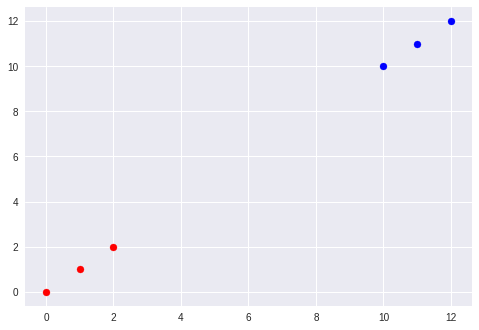

In [40]:
x = [[0,0],
     [1,1],
     [2,2],
     [10,10],
     [11,11],
     [12,12]]
y = [0,0,0,1,1,1]

X_train = np.array(x)
y_train = np.array(y)
import matplotlib.pyplot as plt

plt.scatter(X_train[:3,0],X_train[:3,1],color='red')
plt.scatter(X_train[3:,0],X_train[3:,1],color = 'blue')
plt.show()

In [41]:
x = np.array([13,13])
KNN_classify(2,X_train,y_train,x)

1

## sklearn实现knn分类

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
kNN_classifier = KNeighborsClassifier()
kNN_classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
X_predict = x.reshape(1,-1)
kNN_classifier.predict(X_predict)

array([1])

## 模仿sklearn重新封装knn

In [0]:
import numpy as np
from math import sqrt
from collections import Counter


class KNNClassifier:
  
  def __init__(self,k):
    """初始化knn分类器"""
    assert k >= 1, "k must be valid"
    self.k = k # knn中的k
    self._X_train = None # 训练数据集在类中，用户不能随意操作，故设置为私有
    self._y_train = None
   
  def fit(self,X_train,y_train):
    """根据训练数据集X_train和y_train训练kNN分类器"""
    assert X_train.shape[0] == y_train.shape[0], "the size of X_train must equal to the size of y_train"
    assert self.k <= X_train.shape[0], "the size of X_train must be at least k."
    self._X_train = X_train
    self._y_train = y_train
    return self # 模仿sklearn，调用fit函数会返回自身
  
  def predict(self,X_predict):
    """给定待预测数据集X_predict,跟sklearn一样，要求用户传来的是数组格式的数据，返回表示X_predict的结果向量"""
    assert self._X_train is not None and self._y_train is not None, "must fit before predict!"
    assert X_predict.shape[1] == self._X_train.shape[1], "the feature number of X_predict must be equal to X_train"
    
    y_predict = [self._predict(x) for x in X_predict] # 预测X_predict矩阵每一行所属的类别
    return np.array(y_predict) # 返回的结果也遵循sklearn
  
  def _predict(self,x):
    """给定单个待预测的数据x,返回x_predict的预测结果值"""
    
    # 先判断x是合法的
    assert x.shape[0] == self._X_train.shape[1],"the feature number of x must be equal to X_train"
    distances = [sqrt(np.sum((x_train - x)**2)) for x_train in self._X_train] # 计算新来的数据与整个训练数据的距离
    
    nearest = np.argsort(distances) # 对距离排序并返回对应的索引
    
    topK_y = [self._y_train[i] for i in nearest[:self.k]] # 返回最近的k个距离对应的分类
    votes = Counter(topK_y)
    
    return votes.most_common(1)[0][0]
  
  def __repr__(self):
    return "KNN(k=%d)" % self.k

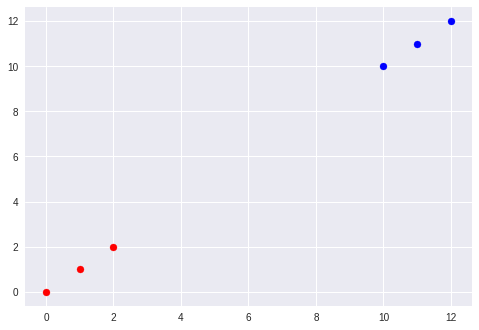

In [35]:
X_train = np.array([[0,0],
              [1,1],
              [2,2],
              [10,10],
              [11,11],
              [12,12]])
y_train = np.array([0,0,0,1,1,1])

import matplotlib.pyplot as plt

plt.scatter(X_train[:3,0],X_train[:3,1],color='red')
plt.scatter(X_train[3:,0],X_train[3:,1],color = 'blue')
plt.show()

In [37]:
x = np.array([[13,13],[-1,-1]])
knn_clf = KNNClassifier(k=2)

knn_clf.fit(X_train,y_train)

KNN(k=2)

In [38]:
knn_clf.predict(x)

array([1, 0])